# Install and import modules

In [1]:
!pip install synthcity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.1 MB/s eta 0:00:0000:0100:01
DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
# stdlib
import sys
import warnings

warnings.filterwarnings("ignore")

# third party -
from sklearn.datasets import load_diabetes

# synthcity absolute --
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [2]:
# Preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
loader = GenericDataLoader(
    X,
    target_column="target",
    sensitive_columns=["sex"],
)

# List the available generative models

In [3]:
# synthcity absolute
from synthcity.plugins import Plugins

Plugins().list()

['decaf',
 'survival_nflow',
 'adsgan',
 'ctgan',
 'survival_ctgan',
 'survival_gan',
 'image_cgan',
 'rtvae',
 'radialgan',
 'dpgan',
 'image_adsgan',
 'survae',
 'bayesian_network',
 'pategan',
 'privbayes',
 'tvae',
 'fflows',
 'nflow',
 'timegan',
 'timevae']

# Load and train a generative model

In [4]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("marginal_distributions")

syn_model.fit(loader)

# Generate new data using the model

In [5]:
syn_model.generate(count=10).dataframe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.012390,-0.044642,0.052872,0.021754,0.027268,0.056934,0.053274,0.067191,0.016427,0.012267,201.169135
1,0.048652,0.050680,0.096268,0.062424,0.073969,0.109243,0.100439,0.110720,0.059634,0.057751,254.575787
2,0.024148,0.050680,0.066944,0.034942,0.042412,0.073896,0.068568,0.081306,0.030437,0.027016,218.487044
3,0.011533,-0.044642,0.051847,0.020794,0.026165,0.055699,0.052160,0.066163,0.015406,0.011192,199.907502
4,-0.014889,0.050680,0.020227,-0.008840,-0.007863,0.017584,0.017793,0.034446,-0.016076,-0.021949,160.993191
5,0.033548,0.050680,0.078194,0.045485,0.054518,0.087457,0.080795,0.092590,0.041638,0.038807,232.332010
6,-0.011852,0.050680,0.023861,-0.005434,-0.003952,0.021965,0.021743,0.038091,-0.012458,-0.018140,165.465495
7,0.087138,0.050680,0.142326,0.105588,0.123535,0.164761,0.150498,0.156919,0.105491,0.106025,311.259133
8,0.102807,0.050680,0.161077,0.123161,0.143714,0.187364,0.170878,0.175728,0.124161,0.125678,334.335746
9,-0.023654,0.050680,0.009738,-0.018669,-0.019151,0.004941,0.006393,0.023925,-0.026520,-0.032942,148.084728


# Generate new data using conditionals

In [6]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("adsgan")

syn_model.fit(loader, cond=y.to_frame())

  7%|██▉                                    | 749/10000 [01:03<12:58, 11.88it/s]


In [7]:
import numpy as np

count = 10
syn_model.generate(
    count=count, cond=np.ones(count)
).dataframe()  # generate only patients with the outcome = 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.021820,-0.044642,-0.014681,-0.035241,0.009052,-0.002369,0.014534,-0.008138,-0.034075,0.050085,76.031349
1,0.005687,0.050680,-0.049583,-0.005665,-0.063762,-0.043247,0.048975,-0.060070,-0.033649,-0.022564,133.800143
2,0.027680,0.050680,-0.010659,0.031837,0.036650,0.015436,0.012847,0.014887,0.013677,0.070877,161.929677
3,0.031213,-0.044642,0.065750,0.015014,0.001733,0.028085,0.147544,-0.059160,-0.029540,-0.014483,147.033256
4,-0.081143,-0.044642,-0.019088,-0.033365,0.057080,0.034821,0.086548,-0.067795,-0.007501,-0.030515,94.266480
5,-0.081756,-0.044642,-0.044794,-0.040423,-0.036494,-0.055827,0.102911,-0.052699,-0.027745,-0.063162,63.803068
6,0.002749,0.050680,-0.030844,0.032328,0.048216,0.069465,-0.030824,0.026043,-0.001867,0.009798,162.994725
7,-0.057220,0.050680,0.052277,0.049564,-0.033077,-0.036415,-0.005237,-0.009789,0.073990,0.028545,254.095460
8,-0.009153,-0.044642,-0.003761,0.075406,-0.067642,-0.056798,0.004109,-0.064020,-0.009912,-0.009394,220.939253
9,-0.011278,0.050680,-0.027784,-0.026081,0.090628,0.150029,-0.009950,0.021919,0.057789,0.015206,137.986888


# Serialization

In [8]:
# synthcity absolute --
from synthcity.utils.serialization import load, load_from_file, save, save_to_file

buff = save(syn_model)

type(buff)

bytes

In [9]:
reloaded = load(buff)

reloaded.name()

'adsgan'

# Plot real-synthetic distributions

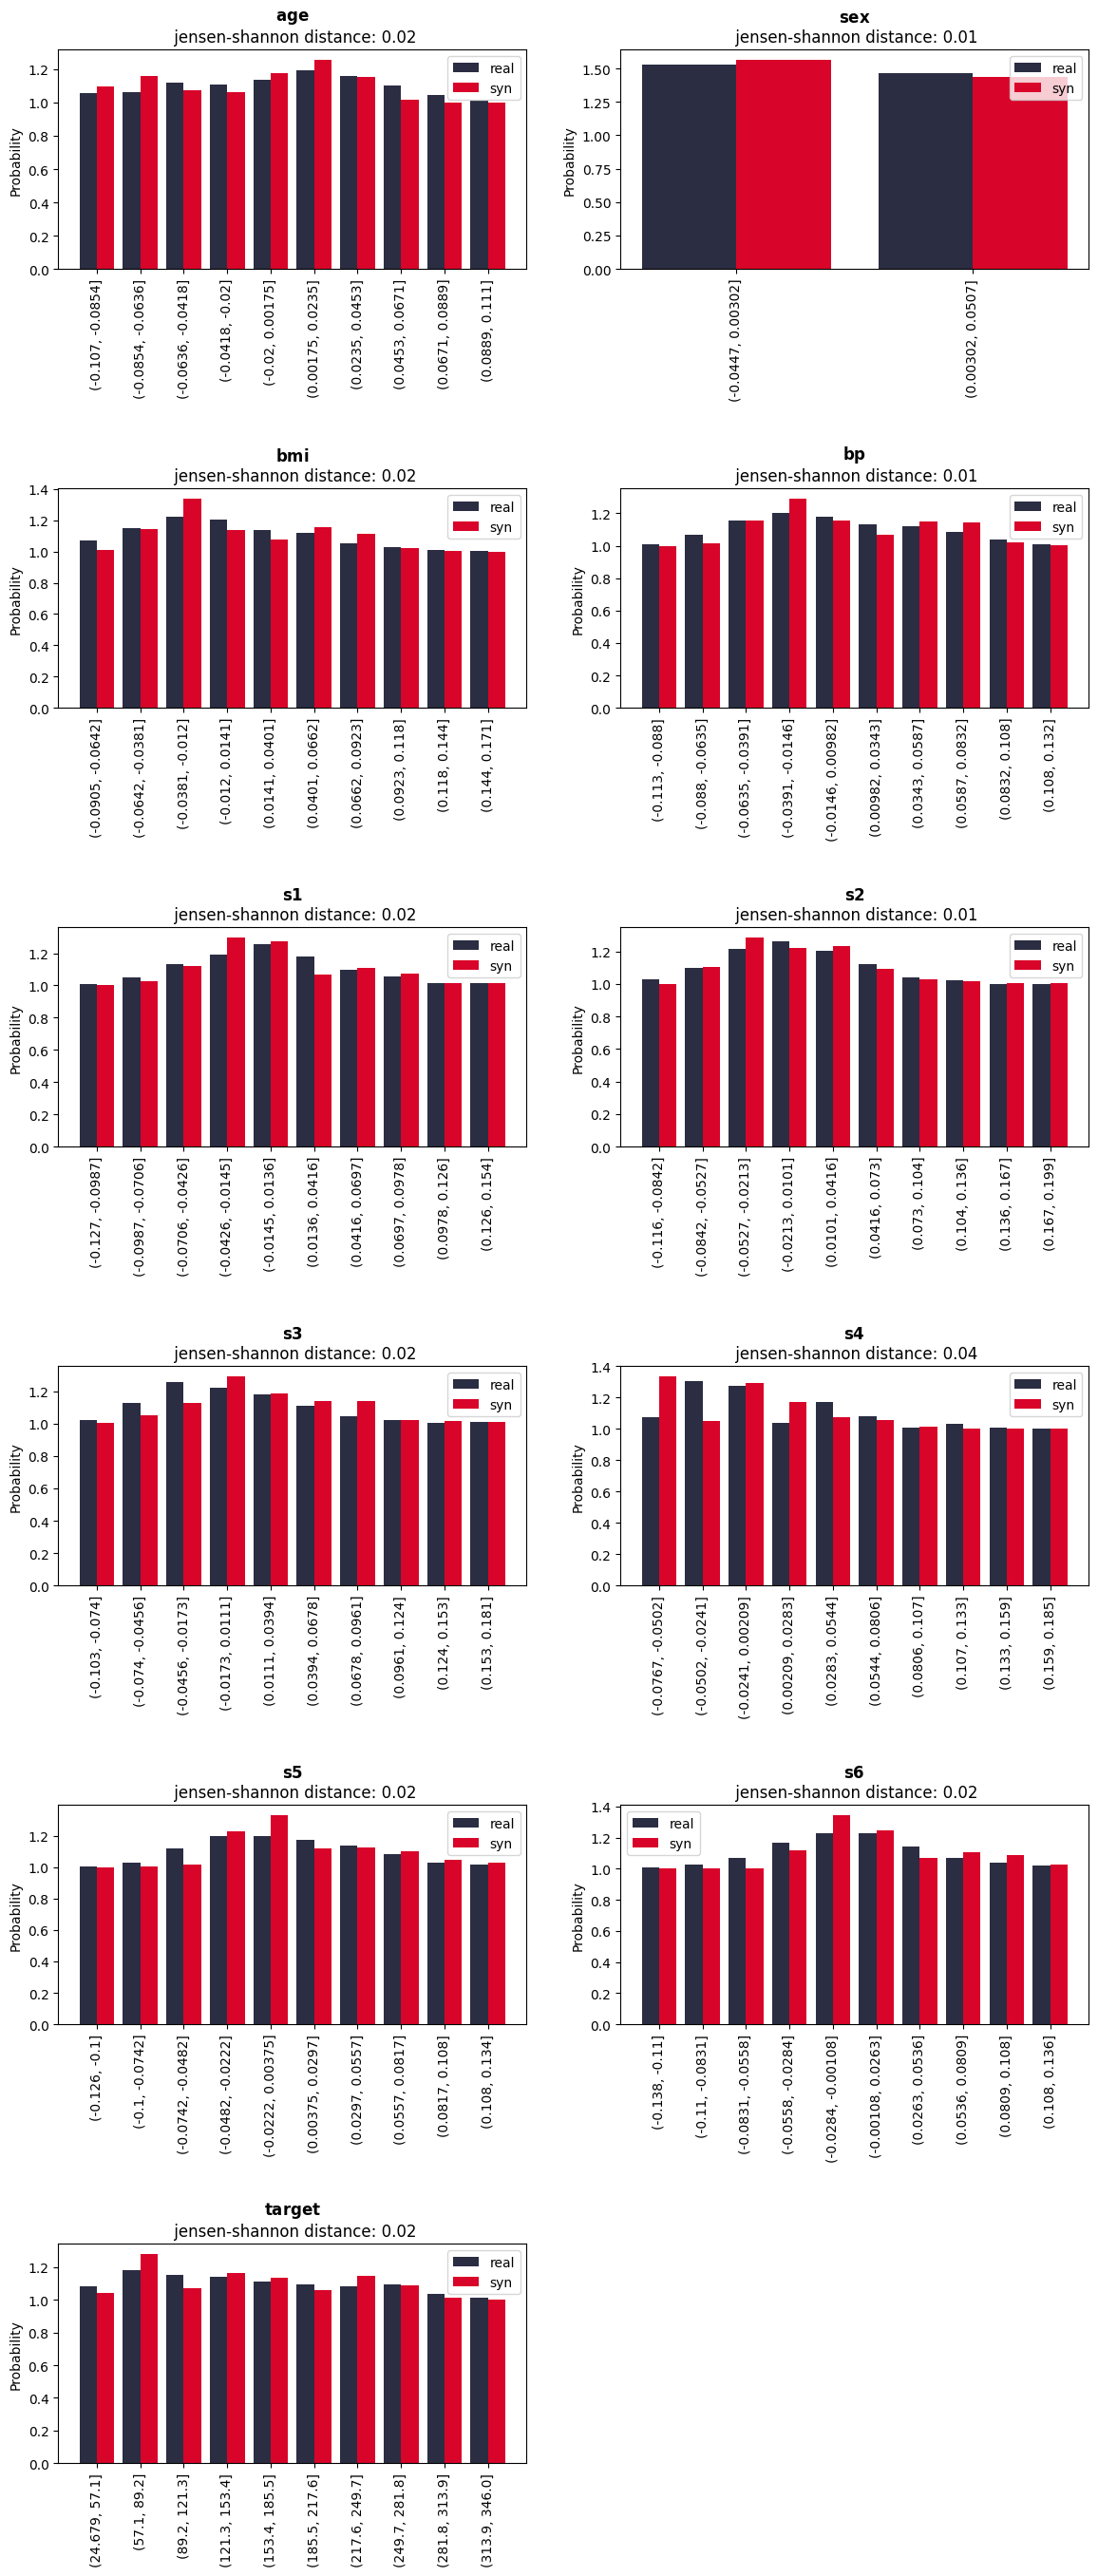

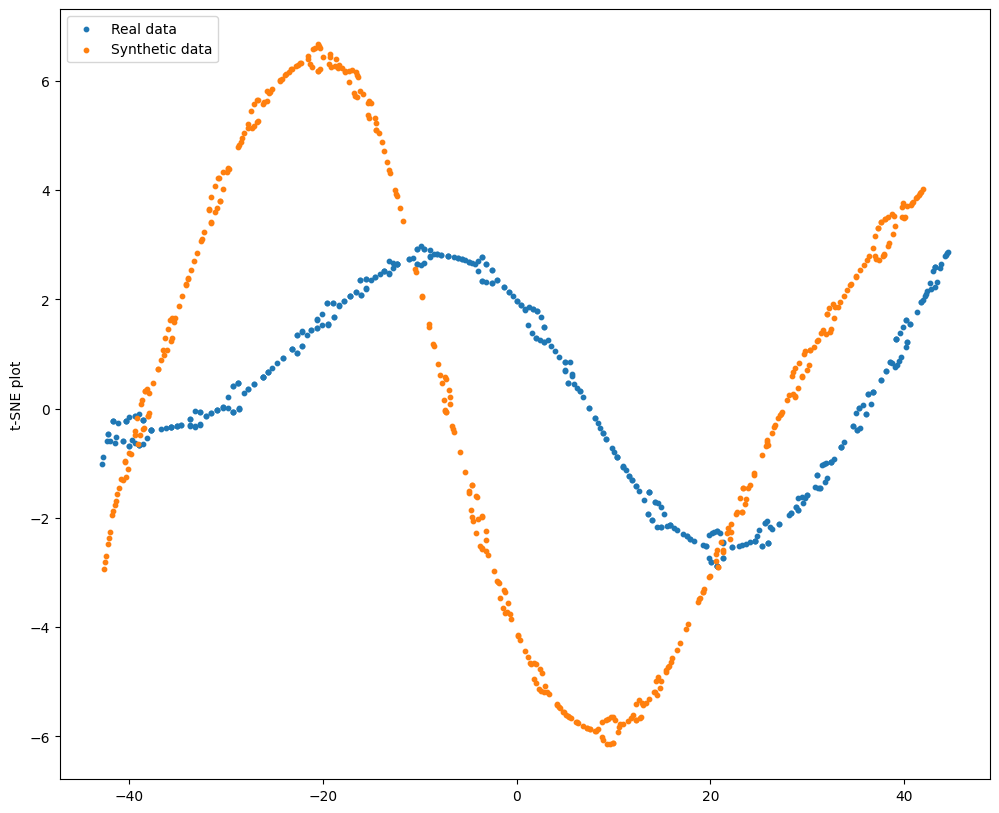

In [10]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

# Benchmark the quality of plugins

In [11]:
# synthcity absolute --
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        ("marginal_distributions", "marginal_distributions", {}),
        ("dummy_sampler", "dummy_sampler", {}),
    ],
    loader,
    synthetic_size=1000,
    repeats=2,
)

In [12]:
Benchmarks.print(score)


Comparatives


,marginal_distributions,dummy_sampler
sanity.data_mismatch.score,0.083 +/- 0.0,0.083 +/- 0.0
sanity.common_rows_proportion.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.nearest_syn_neighbor_distance.mean,0.371 +/- 0.0,0.347 +/- 0.004
sanity.close_values_probability.score,0.303 +/- 0.0,0.365 +/- 0.006
sanity.distant_values_probability.score,0.022 +/- 0.0,0.022 +/- 0.011
stats.jensenshannon_dist.marginal,0.03 +/- 0.0,0.021 +/- 0.001
stats.chi_squared_test.marginal,0.899 +/- 0.0,0.625 +/- 0.003
stats.inv_kl_divergence.marginal,0.764 +/- 0.0,0.739 +/- 0.008
stats.ks_test.marginal,0.711 +/- 0.0,0.801 +/- 0.003
stats.max_mean_discrepancy.joint,0.027 +/- 0.0,0.028 +/- 0.001


# Time-Series

In [13]:
# stdlib
import sys
import warnings

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import TimeSeriesSurvivalDataLoader

log.add(sink=sys.stderr, level="INFO")
warnings.filterwarnings("ignore")

In [14]:
# --
import numpy as np
from synthcity.utils.datasets.time_series.pbc import PBCDataloader

(
    static_surv,
    temporal_surv,
    temporal_surv_horizons,
    outcome_surv,
) = PBCDataloader().load()
T, E = outcome_surv

horizons = [0.25, 0.5, 0.75]
time_horizons = np.quantile(T, horizons).tolist()

loader = TimeSeriesSurvivalDataLoader(
    temporal_data=temporal_surv,
    observation_times=temporal_surv_horizons,
    static_data=static_surv,
    T=T,
    E=E,
    time_horizons=time_horizons,
)

loader.dataframe()

,seq_id,seq_time_id,seq_static_sex,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_ascites,seq_temporal_drug,seq_temporal_edema,seq_temporal_hepatomegaly,seq_temporal_histologic,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,seq_temporal_spiders,seq_out_time_to_event,seq_out_event
0,0,0.569489,0.0,-1.485263,0.248058,-0.894575,0.195532,1.0,0.0,1.0,1.0,3.0,-0.529101,0.136768,3.281890,0.000000,1.0,0.569489,1.0
1,0,1.095170,0.0,0.195488,0.248058,-1.570646,0.285613,1.0,0.0,1.0,1.0,3.0,-0.456022,0.813132,2.015877,-0.469461,1.0,0.569489,1.0
2,1,5.319790,0.0,-0.442126,1.292856,-1.431455,-0.605844,1.0,0.0,1.0,1.0,2.0,-1.395605,0.339677,0.172710,-0.658914,1.0,14.152338,0.0
3,1,6.261636,0.0,-0.046806,1.292856,-1.172958,-0.512364,1.0,0.0,1.0,1.0,2.0,-1.259888,0.339677,-0.013468,-0.603657,1.0,14.152338,0.0
4,1,7.266455,0.0,0.293680,1.292856,-1.312149,-0.443529,1.0,0.0,1.0,1.0,2.0,-1.364286,0.339677,0.098239,0.000000,1.0,14.152338,0.0
5,1,8.263060,0.0,0.116423,1.292856,-0.934344,-0.327954,1.0,0.0,1.0,1.0,2.0,-1.395605,0.339677,-0.013468,0.000000,1.0,14.152338,0.0
6,1,9.251451,0.0,0.116423,1.292856,-0.138966,-0.231075,1.0,0.0,2.0,1.0,2.0,-1.030212,0.204405,-0.199646,-0.714171,1.0,14.152338,0.0
7,1,12.049611,0.0,0.274552,1.292856,1.054101,-0.014372,0.0,0.0,0.0,1.0,2.0,-1.165929,-0.269050,-0.329971,0.000000,1.0,14.152338,0.0
8,1,13.152995,0.0,0.274552,1.292856,0.318376,0.279664,0.0,0.0,0.0,1.0,2.0,-0.758777,0.407314,-0.497532,0.000000,1.0,14.152338,0.0
9,1,13.654036,0.0,0.214616,1.292856,0.417798,0.616191,0.0,0.0,0.0,1.0,2.0,-0.476902,0.001495,-0.534768,0.000000,1.0,14.152338,0.0


# List the available generative models

In [15]:
# synthcity absolute
from synthcity.plugins import Plugins

Plugins(categories=["generic", "time_series"]).list()

['tvae',
 'fflows',
 'bayesian_network',
 'nflow',
 'ctgan',
 'rtvae',
 'timegan',
 'timevae']

# Load and train a generative model

In [16]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("timegan")

syn_model.fit(loader)

[2024-01-29T14:27:43.218811-0500][59112][INFO] TimeGAN: mode = RNN dataloader_sampling_strategy = imbalanced_time_censoring
[2024-01-29T14:27:44.664788-0500][59112][INFO] Encoding sex 8108948012161158458
[2024-01-29T14:27:44.677060-0500][59112][INFO] Encoding SGOT 2264889855735837828
[2024-01-29T14:27:45.165556-0500][59112][INFO] Encoding age 3463085873564835908
[2024-01-29T14:27:45.622689-0500][59112][INFO] Encoding albumin 4505427575574520875
[2024-01-29T14:27:46.050903-0500][59112][INFO] Encoding alkaline 2413104311757900354
[2024-01-29T14:27:46.464639-0500][59112][INFO] Encoding ascites 7202641349217874480
[2024-01-29T14:27:46.469230-0500][59112][INFO] Encoding drug 1544983653338453236
[2024-01-29T14:27:46.472164-0500][59112][INFO] Encoding edema 7739884891206444437
[2024-01-29T14:27:46.476076-0500][59112][INFO] Encoding hepatomegaly 911676491657217419
[2024-01-29T14:27:46.479149-0500][59112][INFO] Encoding histologic 6930331692746563092
[2024-01-29T14:27:46.482045-0500][59112][INF

# Generate new data using the model

In [17]:
syn_model.generate(count=10).dataframe()

[2024-01-29T14:54:42.998515-0500][59112][INFO] [seq_time_id] quality loss for constraints ge = 0.0027379257474500207. Remaining 45. prev length 62. Original dtype float64.


,seq_id,seq_time_id,seq_static_sex,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_ascites,seq_temporal_drug,seq_temporal_edema,seq_temporal_hepatomegaly,seq_temporal_histologic,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,seq_temporal_spiders,seq_out_time_to_event,seq_out_event
0,0,14.305662,1.0,-0.834635,0.334996,0.947011,-0.706081,0.0,1.0,0.0,1.0,3.0,-1.148786,0.264197,-0.340618,-0.412057,0.0,0.464853,1.0
1,0,14.305662,1.0,11.914875,0.333591,0.475155,-0.246988,0.0,1.0,0.0,1.0,3.0,-0.473101,-0.228794,-0.433850,-0.287338,0.0,0.464853,1.0
2,0,14.305662,1.0,-0.223410,0.350892,-0.274450,-0.462116,0.0,1.0,0.0,1.0,3.0,-0.545598,-0.163040,-0.427662,-0.294480,0.0,0.464853,1.0
3,0,14.305662,1.0,-0.221967,0.348972,0.738503,-0.552692,0.0,1.0,0.0,1.0,3.0,-0.467847,-0.503199,-0.309357,0.001981,0.0,0.464853,1.0
4,0,14.305662,1.0,-0.308296,0.368960,0.380652,-0.242849,0.0,1.0,0.0,1.0,3.0,-0.509190,-0.657060,-0.471009,-0.015085,0.0,0.464853,1.0
5,0,14.305662,1.0,-0.567841,0.287371,0.254432,0.216269,0.0,1.0,0.0,1.0,2.0,0.241420,-0.855704,-0.437889,-0.457369,0.0,0.464853,1.0
6,0,14.305662,1.0,-0.110928,0.298148,0.534282,-0.251603,0.0,1.0,0.0,0.0,2.0,-0.485499,-0.831175,-0.438174,0.002407,1.0,0.464853,1.0
7,0,14.305662,1.0,-0.116927,0.318008,1.084767,0.303203,0.0,1.0,0.0,0.0,2.0,-0.216082,-1.034440,-0.471887,0.000240,0.0,0.464853,1.0
8,0,14.305662,1.0,-0.134133,0.320798,0.537155,0.503029,0.0,1.0,0.0,0.0,0.0,-0.620232,-1.054990,-0.452674,-0.000029,0.0,0.464853,1.0
9,0,14.305662,1.0,0.003027,0.330368,1.407244,0.872973,0.0,1.0,0.0,0.0,2.0,-0.244827,-0.646002,-0.452162,-0.000146,0.0,0.464853,1.0


# Plot real-synthetic distributions

[2024-01-29T14:55:11.015026-0500][59112][INFO] [seq_time_id] quality loss for constraints ge = 0.0027379257474500207. Remaining 8188. prev length 12843. Original dtype float64.


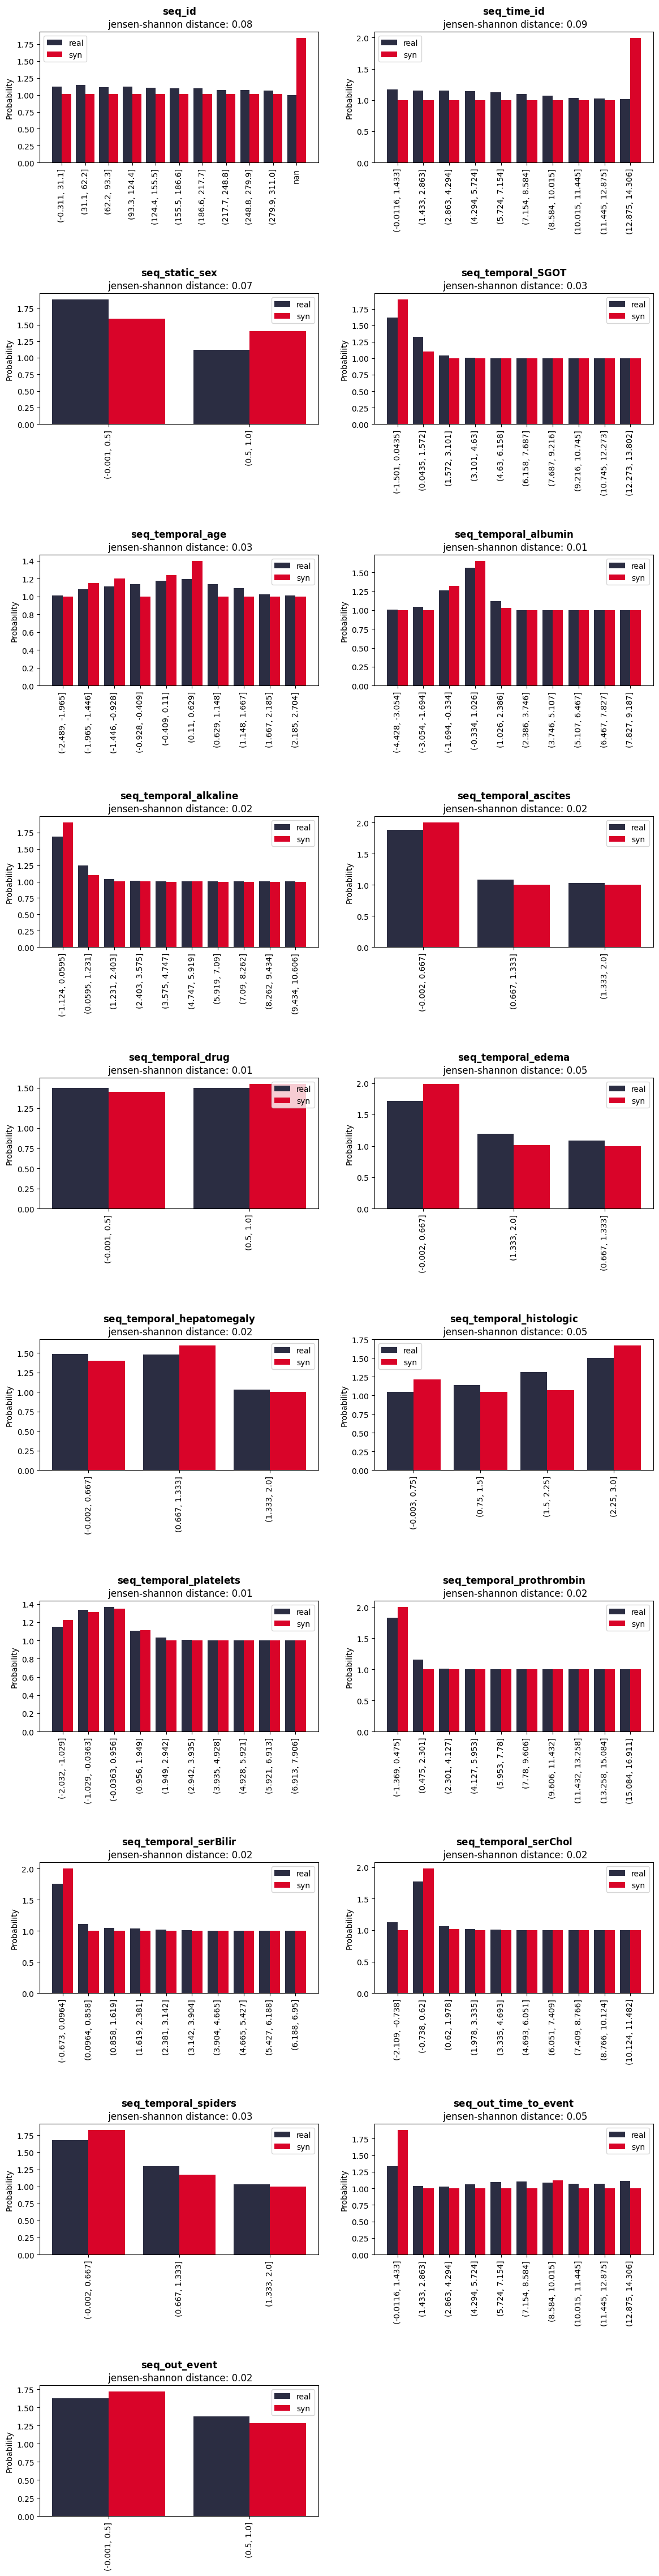

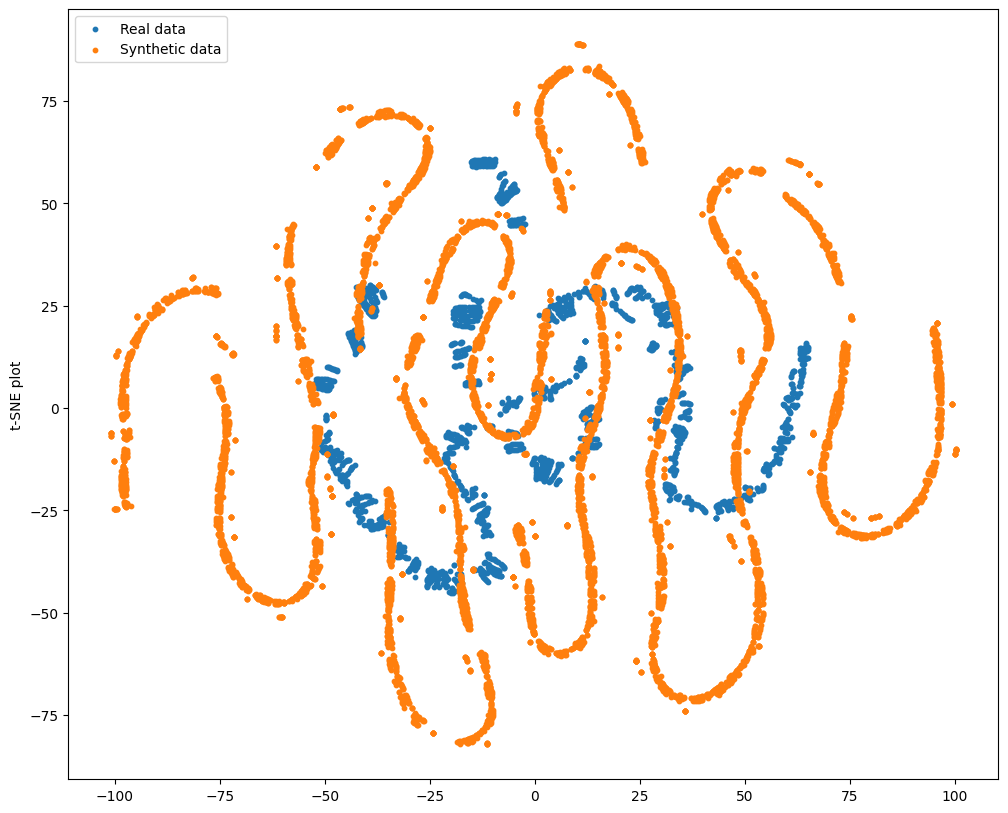

In [18]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()